#### Linear Regression

- Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It provides valuable insights for prediction and data analysis.
- Linear regression is also a type of supervised machine-learning algorithm 
- It learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets


<h4> <b> Advantages </b></h4>

1. The interpretability of linear regression is one of its greatest strengths. 
2. The model’s equation offers clear coefficients that illustrate the influence of each independent variable on the dependent variable, enhancing our understanding of the underlying relationships

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# read data
df=pd.read_csv("weight-height.csv")

In [37]:
df=df.head(300)    ## it is a function to perform certain action

In [38]:
df.shape  ## df.shape is attribute not a function

(300, 3)

In [39]:
df.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [40]:
df.describe()

,Height,Weight
count,300.000000,300.000000
mean,68.828232,186.364443
std,2.777917,19.913064
min,61.477809,135.655876
25%,66.980543,171.666841
50%,68.542843,184.448493
75%,70.973199,199.147674
max,76.709835,241.893563


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  300 non-null    object 
 1   Height  300 non-null    float64
 2   Weight  300 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.2+ KB


In [42]:
df['Gender'].value_counts()

Male    300
Name: Gender, dtype: int64

Text(0, 0.5, 'Height')

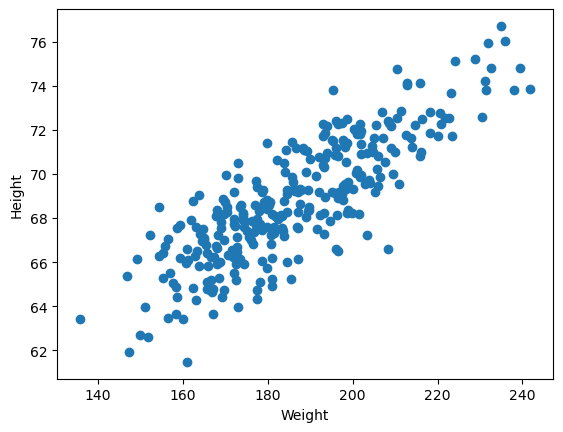

In [43]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [44]:
df.corr()

C:\Users\shailendra.kumar\AppData\Local\Temp\ipykernel_23944\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Height,Weight
Height,1.000000,0.833593
Weight,0.833593,1.000000


In [45]:
import seaborn as sns

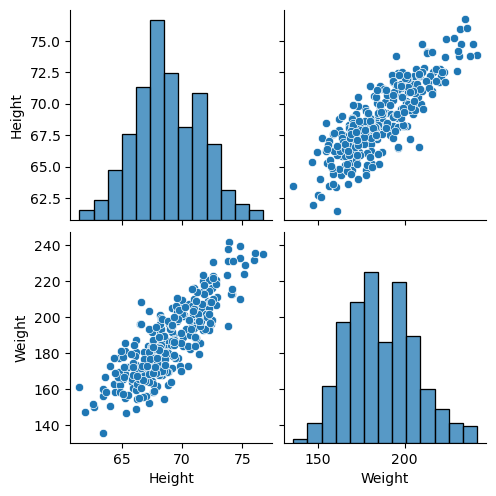

In [46]:
sns.pairplot(df)

In [47]:
X=df[['Weight']] ## Independent feature must be 2 dimension because it give importance to column
y=df['Height']

In [48]:
type(X)

pandas.core.frame.DataFrame

In [49]:
Weight_X=np.array(X)

In [50]:
print(X.shape)
print(y.shape)

(300, 1)
(300,)


In [51]:
## Train test split
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [53]:
print(X_train.shape)
print(y_train.shape)

(225, 1)
(225,)


### Strandardization

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [56]:
X_train=scaler.fit_transform(X_train)

In [57]:
X_train

array([[-8.94547430e-02],
       [ 2.60644013e+00],
       [-1.28864651e+00],
       [-8.65508217e-02],
       [ 1.48832526e+00],
       [ 8.63151323e-01],
       [-8.36255113e-01],
       [-1.92094246e-01],
       [ 3.36626613e-01],
       [-8.87356103e-01],
       [-1.12067867e+00],
       [-4.06741969e-01],
       [-4.55643207e-01],
       [-7.08514455e-01],
       [ 1.86290347e-02],
       [ 1.83735841e+00],
       [-9.32798031e-01],
       [-1.47410196e-01],
       [ 4.53997571e-01],
       [-1.22278503e-01],
       [ 4.93888956e-01],
       [-1.43820922e-01],
       [ 1.50716904e+00],
       [ 4.79895462e-02],
       [ 1.73704020e+00],
       [-2.55088694e+00],
       [ 5.15212350e-01],
       [ 1.34528554e+00],
       [ 4.99938073e-01],
       [-2.59310325e-01],
       [ 9.80867061e-01],
       [-8.41158887e-01],
       [-1.26882749e-02],
       [ 1.24248148e+00],
       [ 3.45901099e-01],
       [-2.88881901e-02],
       [ 9.33572953e-01],
       [ 1.11508230e+00],
       [ 2.2

#### here only transform is done to avoid data leakage

In [58]:
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression=LinearRegression()

In [61]:
regression.fit(X_train,y_train)   # any algorithm in fit accept 2d array

LinearRegression()

In [62]:
regression.coef_

array([2.32564357])

In [63]:
regression.intercept_

68.82247512674665

#### y=2.32x+68.82

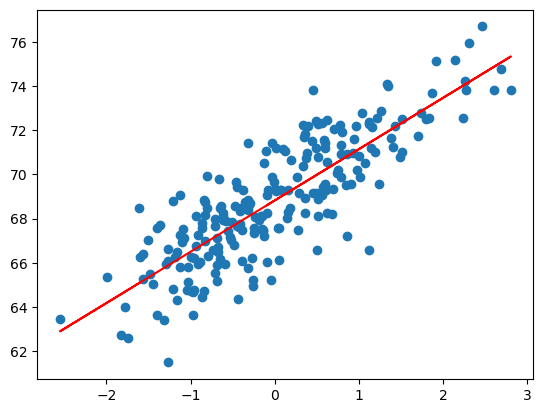

In [64]:
## plot training data and best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')

In [65]:
# prediction for test data
y_pred=regression.predict(X_test)

In [66]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [67]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.356809524456043
1.2802099033344954
1.5351903870387031


#### R-square

In [70]:
from sklearn.metrics import r2_score

In [71]:
score=r2_score(y_test,y_pred)

In [72]:
print(score)

0.68601409214348


In [73]:
import statsmodels.api as sm

In [74]:
model=sm.OLS(y_train,X_train).fit()

In [75]:
prediction=model.predict(X_test)

In [76]:
print(prediction)

[-3.24377006  1.48786584  1.13787872 -3.499428    1.07402673 -3.27167963
 -0.63990274 -1.39238369 -3.99057936 -2.13718864 -1.04243964  0.69075225
  3.09533007  0.31512809 -2.42402322 -2.44012198 -2.29044549  0.83404611
 -3.14865707 -0.95011356  1.19802999 -0.88553393  2.46482672 -1.65175844
 -0.26937682 -2.06637916  1.34910385  0.99801211 -4.57098185  3.46286796
 -1.56605538  0.81892897  2.2224067  -2.84178978  5.4422069   4.34718608
 -2.14222261  1.80451025  0.09676462 -2.71261317 -1.01880777  1.72239654
 -1.55405587  1.46896033  4.06597732 -2.49735203 -1.12590461  3.74410024
  1.78894545  1.79366224 -0.60749392  2.31556827  0.09229216  2.16046299
  2.8307027   1.47880129 -0.65114997 -0.4824177   2.07134202  0.71645376
  5.82816585  2.73177987 -0.27066329 -1.85574443  1.66571523  0.14910978
 -4.34697342  0.33995932  0.40754112  1.84291294 -1.67159142 -0.74684173
 -3.55808849  3.75101177 -1.70566607]


In [78]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.2557
Date:                Sun, 23 Feb 2025   Prob (F-statistic):                       0.614
Time:                        00:29:04   Log-Likelihood:                         -1271.4
No. Observations:                 225   AIC:                                      2545.
Df Residuals:                     224   BIC:                                      2548.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [80]:
### Prediction for new data
regression.predict(scalar.transform([[72]]))

SyntaxError: incomplete input (3736109375.py, line 2)